# Number Theory HW 1
### Gregory Croisdale
### Fall, 2020

# Functions

In [1]:
## Euclidean Algorithm
def euclid(a, b):
    a, b = sorted((a, b))
    
    # y = coeff(x) + rem
    # repeat until remainder is 0
    rem = -1
    coeff = 0
    
    while(rem != 0):
        coeff = a // b
        rem =   a - coeff * b
        a = b
        b = rem
    return a

In [2]:
## Extended Euclidean Algorithm
def ext_euclid(a, b):
    a, b = sorted((a, b))
    
    # remainders
    r = [b, a]
    
    # coefficient of b
    s = [1, 0]
    
    # coefficient of a
    t = [0, 1]
    
    # compute values until remainder is 0
    i = 1
    while(r[i] != 0):
        q = (r[i - 1] // r[i])
        r.append(r[i - 1] - q * r[i])
        s.append(s[i - 1] - q * s[i])
        t.append(t[i - 1] - q * t[i])
        i += 1
        
    # return relevant coefficients and remainder
    return t[i - 1], s[i - 1], r[i - 1]

In [3]:
## Linear Diophantine Equation solver:
#  ax + by = c
def diophantine(a, b, c):
    a, b = sorted((a, b))

#   first, find the coefficients to make the gcd
#   a coeff, b coeff, gcd(a,b)
    x,       y,       d = ext_euclid(a, b)

#   ensure that the desired result is a multiple of the gcd
    assert c % d == 0
    
#   find value we must multiply gcd by to get result
    q = c // d
    
#   ensure that we get the valid result
    assert a * x * q + b * y * q == c 
    
    return x * q, y * q 

In [4]:
# Prime Factorialization
from collections import defaultdict

# Short prime finder
prime_list = [2] + [*filter(lambda i:all(i%j for j in range(3,i,2)), range(3,10000,2))] 

# Prime Factoring Algorithm
def fact(n):
    # dictionary with default value
    out = defaultdict(int)
    
    # fresh new prime list
    primes = prime_list.copy()

    f = primes.pop(0)
    while f <= n:
        if n % f == 0:
            out[f] += 1
            n //= f
        else:
            f = primes.pop(0)
    return out

# Solutions

### Problem 1

In [5]:
# Problem 1
# We can use the euclidian algorithm for each of these problems
problems = {
    "a": (7469, 2464),
    "b": (2689, 4001),
    "c": (2947, 3997),
    "d": (1109, 4999),
}

for i in problems.keys():
    print(i + ":", euclid(*problems[i]))

a: 77
b: 1
c: 7
d: 1


### Problem 2

In [6]:
# Problem 2
# We can use the extended euclidian algorithm for this problem

a, b = 1819, 3587
# first, find gcd
g = euclid(a, b)

# now, solve diophantine equation
x, y = diophantine(1819, 3587, g)
print("({}){} + ({}){} = {}".format(x, a, y, b, g))

(71)1819 + (-36)3587 = 17


### Problem 3

In [7]:
# Problem 3
# For most of these problems, we can use the extended euclidian algorithm
problems = {
    "a": (423, 198, 9),
    "b": (71, -50, 1),
    "c": (43, 64, 1),
    "d": (93, -81, 3),
}

for i in problems.keys():
    a, b, c = problems[i]
    x, y = diophantine(a, b, c)
    print(i + ":", "({})({}) + ({})({}) = {}".format(x, a, y, b, c))

print("=" * 30, "\ne:")
# For problem e, we need to solve a smaller diophantine equation to make a coprime
# with the other value.

# Let's solve (6)x + (15)y = gcd(6, 15) = 3 first.
a, b, c = 6, 15, 3
x, y = diophantine(a, b, c)

print("({})({}) + ({})({}) = {}".format(x, a, y, b, c))
# Now, we can substitute 3 for 6 and 15 in our original equation.
# s * ((-2)(6) + (1)(15)) + z * 10 = 1
#         Which is the same as
#           s(3) + z(10) = 1

# If we solve this equation, we can just multiply our '3' term by s and get our answer.
a, b, c = 3, 10, 1
s, z = diophantine(a, b, c)
print("({})({}) + ({})({}) = {}".format(s, a, z, b, c))

# Now, we multiply the coefficients we got before:
x *= s
y *= s

# Let's verify that our equation works and print the result:
assert 6 * x + 15 * y + 10 * z == 1
print("({})({}) + ({})({}) + ({})({}) = {}".format(x, 6, y, 15, z, 10, 1))

a: (15)(423) + (-7)(198) = 9
b: (-27)(71) + (-19)(-50) = 1
c: (3)(43) + (-2)(64) = 1
d: (8)(93) + (7)(-81) = 3
e:
(-2)(6) + (1)(15) = 3
(-3)(3) + (1)(10) = 1
(6)(6) + (-3)(15) + (1)(10) = 1


### Problem 4

In [8]:
# Problem 4 (I didn't realize it wasn't required... Ooops...)
# Multiply prime factors by maximum quantity in prime factorialization of each number
problems = {
    "a": (482, 1687),
    "b": (60, 61),
}

for i in problems.keys():
    a, b = problems[i]
    a_fact, b_fact = fact(a), fact(b)
    
    lcm = 1
    
    # loop through each unique factor in combined list
    for j in set(list(a_fact.keys()) + list(b_fact.keys())):
        # multiply lcm by maximum instances of factor
        lcm *= j * max(a_fact[j], b_fact[j])
    
    print(i + ":", lcm)

a: 3374
b: 3660


### Problem 6
By Theorem 1.21 in the book (pg 36), it is known that "The product of any $k$ consecutive integers is divisible by $k!$". I'll prove this another way as an exercise in diminishing laziness.

Using the table below, we can prove that for a sequence of $n$ consecutive integers $a_i$, exactly $1$ is divisible by $n$ ($a_i = 0$ when $i == j$). Furthermore, it follows that at least $1$ of the consecutive integers is divisble by $d$ $\forall d \in \mathbb{Z}: |d| < n$.

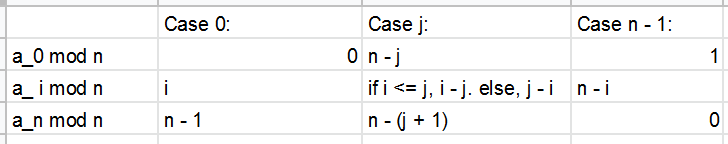

In [2]:
from IPython.display import Image
Image(filename='table.png')

#### Part I
Let us call this consecutive product $p$. Because of the above table, we know that $2|p$ and $3|p$, as $2,3 \leq 3$. Because of the properties of divisibility, we know that $6 | p$ because $2$ and $3$ are co-prime and $2\cdot3=6$.

We can verify this using the Theorem 1.21 - It is known that $3$ consecutive integers are divisble by $3! = 6$.
#### Part II

Let us call this consecutive product $p$. Because of the above table, we know that $4|p$ and $3|p$, as $3,4 \leq 4$. We also know that $2$ of the numbers are divisible by $2$ and exactly one of them is also divisible by $4$ as mentioned before. Now we know that one of the integers is divisible by $2$ and not $4$, one is divisible by $3$, and one is divisible by $4$. Therefore, $2\cdot 3\cdot 4|P\Rightarrow 24 | P$.

We can verify this using the Theorem 1.21 - It is known that $4$ consecutive integers are divisble by $4! = 24$.

### Problem 9

$ac|bc\Rightarrow ac * k = bc$ for some $k \in \mathbb{Z}$.

By dividing both sides by $c$, we get $a*k=b \Leftrightarrow a|b$.

### Problem 11

Proof by contradiction:

Let's assume that $\exists n \in \mathbb{Z}: 4 | (n^2 + 2)$

If $n$ is odd, $\exists k \in \mathbb{Z}: (2k + 1)^2 = n^2$

$\Rightarrow n^2 = 4k^2 + 4k + 1 \Rightarrow (n^2+2)$ is odd $\Rightarrow 4 \nmid (n^2+2)$ if $n$ is odd.

Therefore, $n$ cannot be odd.

Now, let's assume that $n$ is even:

$\exists k \in \mathbb{Z}: (2k)^2 = n^2$.

$\Rightarrow n^2 = 4k \Rightarrow (n^2 + 2) = (4k + 2) \Rightarrow 4 \nmid (n^2 + 2)$

Therefore, $n$ can neither be even nor odd $\Rightarrow \not\exists n \in \mathbb{Z}: 4 | (n^2 + 2)$.

Sorry, $n$.

### Problem 14

If $n$ is odd, $\exists k \in \mathbb{Z}: 2k + 1 = n$.

$\Rightarrow n^2 = (2k + 1)^2 = 4k^2 + 4k + 1$.

$\Rightarrow n^2 - 1 = 4k^2 + 4k = 4k(k + 1)$

#### Case 1: $k=0$ or $k=-1$

$\Rightarrow 4k(k+1) = 0 \Rightarrow 8 | 4k(k+1)$

#### Case 2: $k$ is odd

$\exists j \in \mathbb{Z}: k = (2j + 1)$.

$\Rightarrow 4k(k+1) = 4(2j + 1)((2j + 1) + 1) = 8(2j+1)(j+1)\Rightarrow 8 | 4k(k+1)\Rightarrow 8 | n^2 - 1$


#### Case 3: $k$ is even

$\exists j \in \mathbb{Z}: k = (2j)$.

$\Rightarrow 4k(k+1) = 4(2j)((2j) + 1) = 8j(2j+1)\Rightarrow 8 | 4k(k+1)\Rightarrow 8 | n^2 - 1$


Therefore, if $n$ is odd, $8 | (n^2 - 1)$